[?] different between: 
- combine loss
- model with 2 brand output 


[!] với multiple output: mình có thể sử dụng để tăng độ chính xác, mỗi brand học một thuộc tính. -> đoạn share weight có thể là các lowlevel feature của cả 2 brands. 


# branching/ Multi-outputs


- Note: model like Inception have different brand to learn different fts and then concatenated 



In [ ]:
import pandas as pd
import tensorflow as tf 
import numpy as np

from tensorflow.keras.layers import Input 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

UTILS

In [ ]:
def format_output(data):
  y1 = data['Y1'] 
  y2 = data['Y2'] 
  return y1, y2 

def norm(data,train):
  return (data - train.mean().values) / train.std().values

def plot_diff(y_true, y_pred, title):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')
  plt.show()

def plot_metrics(metric_name, title, history):
  plt.title(title)
  plt.plot(
      history.history[metric_name], 
      color='blue', 
      label=metric_name
      )
  plt.plot(
      history.history['val_{}'.format(metric_name)], 
      color='green', 
      label='val_{}'.format(metric_name)
      )
  plt.show()

In [ ]:
!gdown '1n3X4W7lLGxXWbqZ3WxtUWR9VtFZxg_MI' 

df = pd.read_excel('/content/ENB2012_data.xlsx')
df.shape

Downloading...
From: https://drive.google.com/uc?id=1n3X4W7lLGxXWbqZ3WxtUWR9VtFZxg_MI
To: /content/ENB2012_data.xlsx
100% 76.2k/76.2k [00:00<00:00, 67.1MB/s]


(768, 10)

In [ ]:
# sampling df.sample(frac=.1).reset_index(drop=True)

In [ ]:
train, test = train_test_split(df, test_size=0.2) 
Xtrain = train.drop(['Y1', 'Y2'], axis=1)
Xtest = test.drop(['Y1', 'Y2'], axis=1)
ytrain = format_output(train)
ytest = format_output(test)

X_norm_train = norm(Xtrain, Xtrain)
X_norm_test = norm(Xtest, Xtrain)

In [ ]:
X_norm_train

,X1,X2,X3,X4,X5,X6,X7,X8
205,0.509740,-0.655817,0.006365,-0.644526,0.992697,-0.457609,-1.003319,0.781074
731,0.884231,-0.932188,-0.551896,-0.644526,0.992697,1.320696,1.254608,1.430032
243,2.007703,-1.761299,-0.551896,-1.455466,0.992697,1.320696,-1.003319,1.430032
195,2.007703,-1.761299,-0.551896,-1.455466,0.992697,1.320696,-1.003319,0.781074
101,1.258722,-1.208558,0.006365,-1.185153,0.992697,-0.457609,-1.003319,-0.516841
...,...,...,...,...,...,...,...,...
169,-0.239241,0.173294,-1.668417,0.977355,-1.005716,-0.457609,-1.003319,0.132117
734,0.509740,-0.655817,0.006365,-0.644526,0.992697,0.431543,1.254608,1.430032
370,-0.707354,0.726035,-0.551896,0.977355,-1.005716,0.431543,0.125645,-0.516841
19,0.228872,-0.379447,0.564625,-0.644526,0.992697,1.320696,-1.755962,-1.814756


Build model

In [ ]:
def get_model(Xtrain):
  input_layer = Input(shape=(Xtrain.shape[1]))
  x = Dense(128, activation='relu')(input_layer)
  x = Dense(128, activation='relu')(x)
  third = Dense(64, activation='relu')(x)

  y1_output = Dense(1, activation='softmax')(x)
  y2_output = Dense(1, activation='softmax')(third)

  model = Model(
      inputs=input_layer, 
      outputs=[y1_output, y2_output]
  )
  return model

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.01)
model = get_model(Xtrain)
model.compile(
    optimizer=optimizer, 
    loss={'y1_output': 'mse', 'y2_output': 'mse'}, 
    metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(), 
             'y2_output': tf.keras.metrics.RootMeanSquaredError()}
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train model

In [ ]:
X_norm_test.shape

(154, 8)

In [ ]:
X_norm_train.shape

(614, 8)

In [ ]:
EPOCHS = 300 
BATCH_SIZE = 64 
history=model.fit(
    X_norm_train,
    ytrain, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(X_norm_test, ytest)
)

Epoch 1/300
10/10 [==============================] - 0s 28ms/step - loss: 3.4816 - y1_output_loss: 0.9465 - y2_output_loss: 2.5351 - y1_output_root_mean_squared_error: 0.9729 - y2_output_root_mean_squared_error: 1.5922 - val_loss: 3.9162 - val_y1_output_loss: 1.1034 - val_y2_output_loss: 2.8129 - val_y1_output_root_mean_squared_error: 1.0504 - val_y2_output_root_mean_squared_error: 1.6772
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 3.4255 - y1_output_loss: 0.9476 - y2_output_loss: 2.4779 - y1_output_root_mean_squared_error: 0.9734 - y2_output_root_mean_squared_error: 1.5741 - val_loss: 3.8371 - val_y1_output_loss: 1.0767 - val_y2_output_loss: 2.7605 - val_y1_output_root_mean_squared_error: 1.0376 - val_y2_output_root_mean_squared_error: 1.6615
Epoch 3/300
10/10 [==============================] - 0s 14ms/step - loss: 3.3911 - y1_output_loss: 0.9069 - y2_output_loss: 2.4842 - y1_output_root_mean_squared_error: 0.9523 - y2_output_root_mean_squared_error: 1.576

In [ ]:
loss, y1_loss, y2_loss, y1_rmse, y2_rmse= model.evaluate(x=X_norm_test, y = ytest)

5/5 [==============================] - 0s 3ms/step - loss: 1.8304 - y1_output_loss: 0.3874 - y2_output_loss: 1.4430 - y1_output_root_mean_squared_error: 0.6224 - y2_output_root_mean_squared_error: 1.2012


In [ ]:
ypred = model.predict(X_norm_test)

5/5 [==============================] - 0s 11ms/step


In [ ]:
y_pred[0].shape

(154, 1)

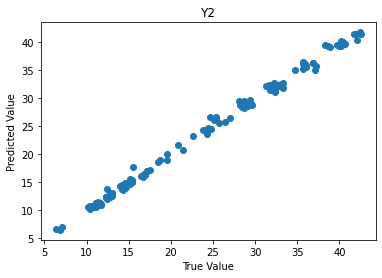

In [ ]:
plot_diff(ytest[0], ypred[0], title = 'Y2')

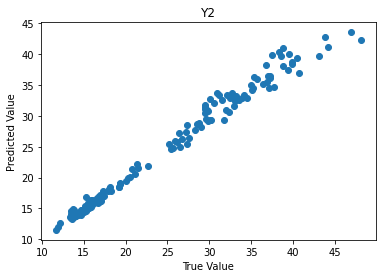

In [ ]:
plot_diff(ytest[1], ypred[1], title = 'Y2')

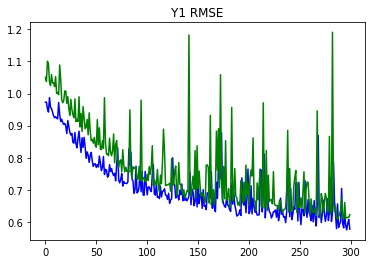

In [ ]:
plot_metrics('y1_output_root_mean_squared_error', 'Y1 RMSE', history)


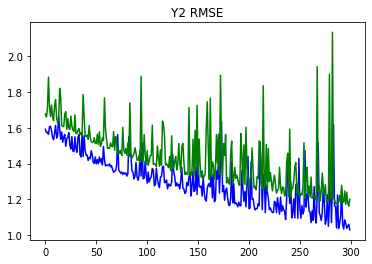

In [ ]:
plot_metrics('y2_output_root_mean_squared_error', 'Y2 RMSE', history)


In [ ]:
history.history.keys()

dict_keys(['loss', 'y1_output_loss', 'y2_output_loss', 'y1_output_root_mean_squared_error', 'y2_output_root_mean_squared_error', 'val_loss', 'val_y1_output_loss', 'val_y2_output_loss', 'val_y1_output_root_mean_squared_error', 'val_y2_output_root_mean_squared_error'])